In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from src.models.debiaser_pruned import DebiaserPruned
from nn_pruning.model_structure import BertStructure
from analysis.model_card_graphics import DensityBokehPlotter

In [2]:
models = [
    ('last-layer/sentence', '/remote/csifs1/disk1/przm/models/pruned/B32/bert-base-uncased/last-layer/sentence-debias/multiruns/2021-11-16_14-08-39/0/checkpoints/epoch=99-step=24599.ckpt'),
    ('last-layer/token', '/remote/csifs1/disk1/przm/models/pruned/B32/bert-base-uncased/last-layer/token-debias/multiruns/2021-11-16_14-08-39/1/checkpoints/epoch=99-step=24599.ckpt'),
    ('all-layer/sentence', '/remote/csifs1/disk1/przm/models/pruned/B32/bert-base-uncased/all-layer/sentence-debias/multiruns/2021-11-16_14-10-53/0/checkpoints/epoch=99-step=24599.ckpt'),
    ('all-layer/token', '/remote/csifs1/disk1/przm/models/pruned/B32/bert-base-uncased/all-layer/token-debias/multiruns/2021-11-16_14-10-53/1/checkpoints/epoch=99-step=24599.ckpt'),
]

In [3]:
def get_avg_density_per_layer(layer_info):
    layer_avg_density = defaultdict(lambda: 0)

    for info in layer_info:
        name = info['name']
        density = info['density']

        layer_idx = BertStructure.layer_index(name)
        layer_avg_density[layer_idx] += density

    for key, val in layer_avg_density.items():
        print
        layer_avg_density[key] = val / 5.0

    return layer_avg_density

In [4]:
per_model = {}

dbp = DensityBokehPlotter("density", "$$JS_PATH$$")


for model_name, ckpt_path in models:
    
    print(f'Proessing {model_name}')
    model = DebiaserPruned.load_from_checkpoint(ckpt_path)
    removed_heads, total_heads = model.model_patcher.compile_model(model.model_debias.model)
    
    print(f'{model_name}: removed {removed_heads}/{total_heads}')
    
    fig, _, _ = dbp.run(model.model_debias.model, 'tmp/imgs', 'tmp/imgs')
    
    per_model[model_name] = get_avg_density_per_layer(dbp.layers)

Proessing last-layer/sentence


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

last-layer/sentence: removed 0/144
Proessing last-layer/token


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

last-layer/token: removed 0/144
Proessing all-layer/sentence


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

all-layer/sentence: removed 0/144
Proessing all-layer/token


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

all-layer/token: removed 0/144


In [8]:
rename = {
    'last-layer/sentence': 'last-sentence',
    'last-layer/token': 'last-token',
    'all-layer/sentence': 'all-sentence',
    'all-layer/token': 'all-token',
}

for k_old, k_new in rename.items():
    per_model[k_new] = per_model.pop(k_old)

In [11]:
per_model.keys()

dict_keys(['last-sentence', 'last-token', 'all-sentence', 'all-token'])

In [12]:
df = pd.DataFrame(per_model)
df.head()

,last-sentence,last-token,all-sentence,all-token
0,0.791667,0.784852,0.716233,0.734635
1,0.729948,0.703689,0.653212,0.660503
2,0.744835,0.737760,0.633550,0.678776
3,0.732943,0.721050,0.628125,0.668793
4,0.651736,0.663672,0.624566,0.645356


<Figure size 1200x400 with 0 Axes>

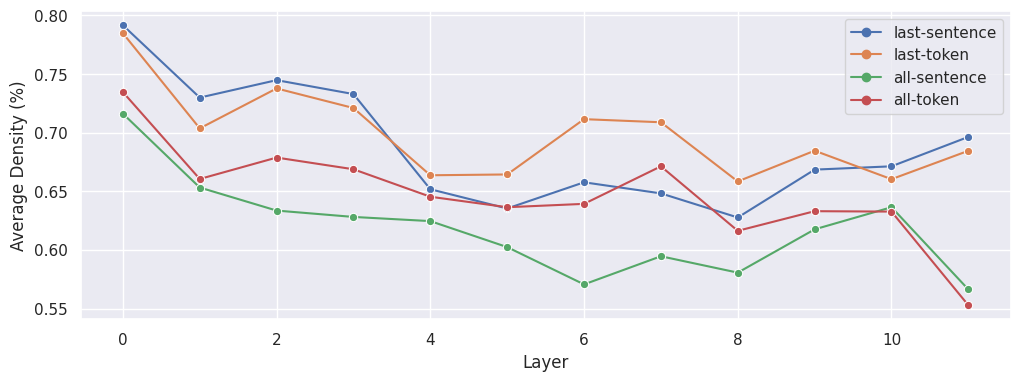

In [58]:
sns.set_theme()
sns.despine(left=True, bottom=True)


sns.set(rc={'figure.figsize': (12, 4)})


fig, ax = plt.subplots()

ax = sns.lineplot(
    data=df,
    dashes=False,
    linestyle='-',
    markers=['o'] * len(per_model)
)

ax.set(xlabel='Layer', ylabel='Average Density (%)')
plt.savefig("data/fig/avg-sparsity-b32.svg", bbox_inches='tight')
plt.savefig("data/fig/avg-sparsity-b32.pdf", bbox_inches='tight')
plt.savefig("data/fig/avg-sparsity-b32.png", bbox_inches='tight')
plt.show();

# TODO
 - [ ] https://seaborn.pydata.org/generated/seaborn.set_palette.html#seaborn.set_palette

### Visualize (HF code)

In [94]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook, reset_output

try:
    reset_output()
    output_notebook()
    show(fig)
except:
    output_notebook()
    show(fig)

print('blue is preserved, pink is pruned')

Loading BokehJS ...

Loading BokehJS ...

ValueError: Invalid object to show. The object to passed to show must be one of:

* a LayoutDOM (e.g. a Plot or Widget or Layout)
* a Bokeh Application
* a callable suitable to an application FunctionHandler


In [61]:
model.model_debias.model.encoder.layer

BertLayer(
  (attention): BertAttention(
    (self): BertSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [104]:
# ckpt = '/remote/csifs1/disk1/przm/models/pruned/B32/bert-base-uncased/last-layer/sentence-debias/multiruns/2021-11-16_14-08-39/0/checkpoints/epoch=99-step=24599.ckpt'

ckpt = '/remote/csifs1/disk1/przm/debias/logs/pruned/B64x768/V-only/bert-base-uncased/last-layer/sentence-debias/runs/2021-12-14/19-17-41/checkpoints/epoch=19-step=4919.ckpt'

model = DebiaserPruned.load_from_checkpoint(ckpt)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

In [105]:
model

DebiaserPruned(model_name='bert-base-uncased', embedding_layer='last', debias_mode='sentence', learning_rate=5e-05, weight_decay=0.0, adam_eps=1e-08, warmup_steps=0, loss_alpha=0.2, loss_beta=0.8, sparse_train_args={'distil_alpha_ce': 0.1, 'distil_alpha_teacher': 0.9, 'mask_scores_learning_rate': 0.01, 'initial_warmup': 1, 'final_warmup': 10, 'initial_threshold': 0, 'final_threshold': 0.1, 'dense_pruning_method': 'sigmoied_threshold:1d_alt', 'dense_block_rows': 1, 'dense_block_cols': 1, 'attention_pruning_method': 'sigmoied_threshold', 'attention_block_rows': 64, 'attention_block_cols': 768, 'attention_lambda': 1.0, 'mask_init': 'constant', 'mask_scale': 0.0, 'regularization': 'l1', 'attention_output_with_dense': 0, 'layer_norm_patch_steps': 50000, 'gelu_patch_steps': 50000, 'linear_min_parameters': 0}, freeze_weights=True)

In [113]:
threshold = model.sparse_args.final_threshold
spts = []

for idx, layer in enumerate(model.model_debias.model.encoder.layer):
    avg = 0
    avg_cntr = 0
    for name, p in layer.named_parameters():
        if 'mask_scores' in name and 'value' in name:
            nnz = (torch.sigmoid(p) >= threshold).sum()
            numel = p.numel()
            avg += nnz / numel
            avg_cntr += 1
#         if 'intermediate' in name:
#             nnz = (torch.sigmoid(p) >= threshold).sum()
#             numel = p.numel()
#             avg += nnz / numel
#             avg_cntr += 1
            

    spts.append(avg / avg_cntr)

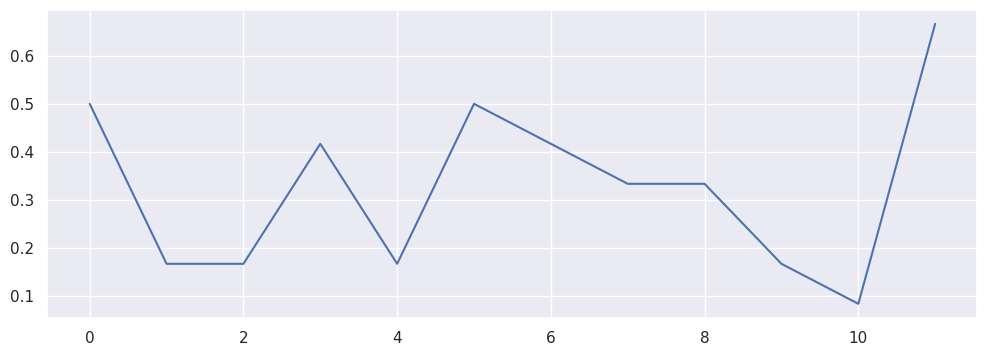

In [114]:
plt.plot(spts)
plt.show()